<a href="https://colab.research.google.com/github/najnin26/ML_Algo_Implement/blob/main/Decision%20Tree/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fetching Dataset***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import cv2

In [ ]:
digits=pd.read_csv('/content/drive/MyDrive/ML And QML/SVM/train.csv')

In [ ]:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
four=digits.iloc[3,1:]
four.shape

(784,)

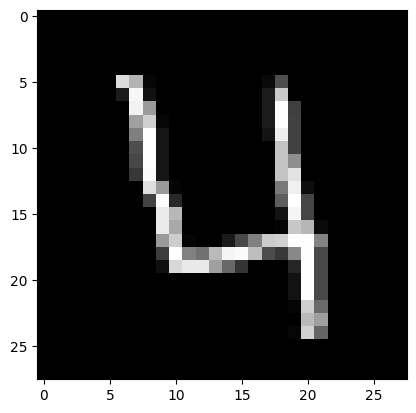

In [ ]:
four=four.values.reshape(28,28)
plt.imshow(four,cmap='gray')

# ***visualise the array***

In [ ]:
print(four[5:-5,5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [ ]:

# Summarise the counts of 'label' to see how many labels of each digit are present
digits.label.value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [ ]:
# Summarise count in terms of percentage
100*(round(digits.label.astype('category').value_counts()/len(digits.index),4))

label
1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: count, dtype: float64

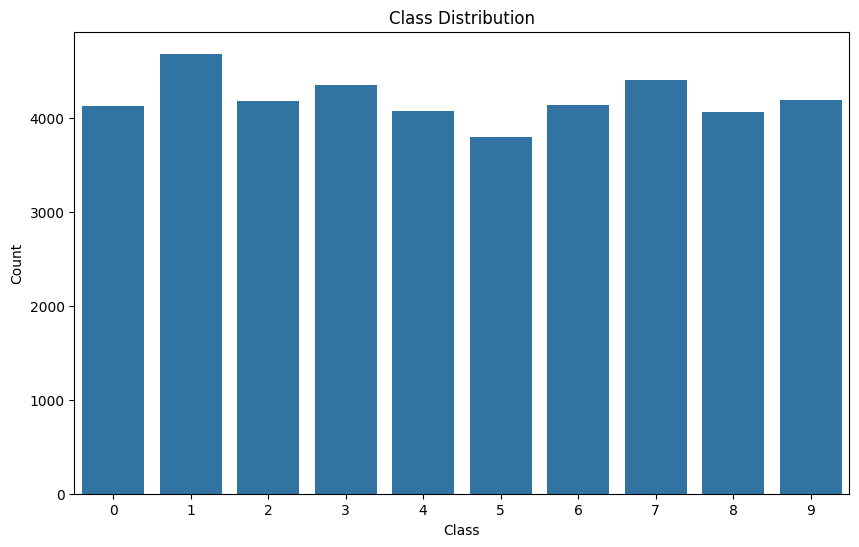

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=digits)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
digits.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
# average values/distributions of features
description = digits.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# ***Data Preparation for Model Building***

In [ ]:
# Creating training and test sets
# Splitting the data into train and test
X = digits.iloc[:, 1:]
Y = digits.iloc[:, 0]

# Rescaling the features
from sklearn.preprocessing import scale
X = scale(X)

# train test split with train_size=10% and test size=90%
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


# ***Decision Tree(Gini)***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:

pred=classifier.predict(x_test)

In [ ]:
pred[:10]

array([8, 3, 0, 0, 1, 7, 1, 5, 0, 5])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=metrics.accuracy_score(y_test,pred)
print(accuracy)

0.7721164021164021


In [ ]:
confusion=confusion_matrix(y_test,pred)
confusion

array([[3269,    6,   77,   87,   19,   89,   69,   27,   41,   31],
       [   4, 3715,   88,   40,   41,   42,   43,   93,  103,   16],
       [ 112,   93, 2696,  169,  113,   78,  182,  104,  169,   74],
       [  77,   51,  145, 2830,   83,  260,   58,   75,  189,  132],
       [  38,   32,   76,   53, 2846,   76,   92,  104,   71,  314],
       [ 120,   89,   79,  299,   86, 2208,  199,   75,  138,  125],
       [ 104,   42,  112,   28,  117,  122, 3006,   16,  117,   29],
       [  18,   49,   82,   69,   85,   18,   14, 3437,   41,  141],
       [  31,  129,  123,  203,   92,  247,  150,   77, 2478,  135],
       [  29,   33,   60,  115,  257,  148,   54,  219,  162, 2701]])

In [ ]:
class_report=metrics.classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3715
           1       0.88      0.89      0.88      4185
           2       0.76      0.71      0.74      3790
           3       0.73      0.73      0.73      3900
           4       0.76      0.77      0.76      3702
           5       0.67      0.65      0.66      3418
           6       0.78      0.81      0.80      3693
           7       0.81      0.87      0.84      3954
           8       0.71      0.68      0.69      3665
           9       0.73      0.71      0.72      3778

    accuracy                           0.77     37800
   macro avg       0.77      0.77      0.77     37800
weighted avg       0.77      0.77      0.77     37800



# ***Decision Tree(Entropy)***

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred=classifier.predict(x_test)

In [ ]:
pred[:10]

array([8, 3, 0, 0, 2, 9, 1, 3, 0, 9])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy=metrics.accuracy_score(y_test,pred)
print(accuracy)

0.7815608465608466


In [ ]:
confusion=confusion_matrix(y_test,pred)
confusion

array([[3325,   12,   43,   48,   23,   88,   56,   27,   45,   48],
       [   4, 3777,   95,   63,   28,   36,   14,   65,   81,   22],
       [  90,   55, 2745,  106,  101,   82,  204,  149,  188,   70],
       [  40,   77,  191, 2878,   43,  235,   49,   96,  158,  133],
       [  28,   29,   66,   51, 2762,   59,  129,   75,   85,  418],
       [  91,   76,   53,  325,  117, 2195,  153,   68,  154,  186],
       [ 119,   46,  108,   18,   92,  108, 3019,   22,  102,   59],
       [  17,   42,  160,   58,   54,   31,   21, 3381,   33,  157],
       [  46,  114,  106,  148,   85,  180,  128,   52, 2644,  162],
       [  28,   28,   57,  122,  267,  108,   46,  175,  130, 2817]])

In [ ]:
class_report=metrics.classification_report(y_test,pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3715
           1       0.89      0.90      0.89      4185
           2       0.76      0.72      0.74      3790
           3       0.75      0.74      0.75      3900
           4       0.77      0.75      0.76      3702
           5       0.70      0.64      0.67      3418
           6       0.79      0.82      0.80      3693
           7       0.82      0.86      0.84      3954
           8       0.73      0.72      0.73      3665
           9       0.69      0.75      0.72      3778

    accuracy                           0.78     37800
   macro avg       0.78      0.78      0.78     37800
weighted avg       0.78      0.78      0.78     37800



## ***Grid Search Cross-Validation***

In [ ]:
param_grid={
    'criterion':['entropy'],
    'max_depth':[None,10,20,30,40,50],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,10]
}

dt=DecisionTreeClassifier(random_state=101)

clf=GridSearchCV(dt,param_grid,scoring='accuracy',return_train_score=True)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [ ]:
cv_results=pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.637373,0.689058,0.003022,0.000459,entropy,None,2,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.757143,...,0.768095,0.014033,32,0.965179,0.966964,0.961905,0.964881,0.967262,0.965238,0.001914
1,0.806428,0.009158,0.002624,0.000093,entropy,None,2,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.760714,...,0.770714,0.016592,17,0.961607,0.963690,0.957143,0.957440,0.959524,0.959881,0.002493
2,0.835595,0.054608,0.002722,0.000305,entropy,None,2,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.755952,...,0.768333,0.016403,26,0.933036,0.933036,0.933333,0.930357,0.930357,0.932024,0.001365
3,1.052752,0.165743,0.003070,0.000445,entropy,None,5,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.769048,...,0.773095,0.009085,2,0.917560,0.914286,0.916071,0.914286,0.910714,0.914583,0.002290
4,0.764556,0.007749,0.002561,0.000021,entropy,None,5,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.769048,...,0.773095,0.009085,2,0.917560,0.914286,0.916071,0.914286,0.910714,0.914583,0.002290
5,0.767869,0.006602,0.002893,0.000559,entropy,None,5,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.769048,...,0.773095,0.009085,2,0.917560,0.914286,0.916071,0.914286,0.910714,0.914583,0.002290
6,0.981059,0.146071,0.003324,0.000326,entropy,None,10,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.751190,...,0.757381,0.021101,37,0.856548,0.860714,0.854167,0.860417,0.853571,0.857083,0.003014
7,0.983992,0.240349,0.005130,0.004617,entropy,None,10,5,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.751190,...,0.757381,0.021101,37,0.856548,0.860714,0.854167,0.860417,0.853571,0.857083,0.003014
8,0.713410,0.013484,0.002586,0.000073,entropy,None,10,10,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.751190,...,0.757381,0.021101,37,0.856548,0.860714,0.854167,0.860417,0.853571,0.857083,0.003014
9,1.020703,0.181258,0.003245,0.000369,entropy,10,2,2,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.758333,...,0.770238,0.011567,22,0.956548,0.963690,0.955357,0.960119,0.961905,0.959524,0.003150


In [ ]:
best_param_dt=clf.best_params_
best_accuracy_dt=clf.best_score_
print("Best parameters for Decision Tree:", best_param_dt)
print("Best cross-validation accuracy for Decision Tree:", best_accuracy_dt)

Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best cross-validation accuracy for Decision Tree: 0.7754761904761904


# ***Best Model***

In [ ]:
param_grid={
    'criterion':['entropy'],
    'max_depth':[None,10],
    'min_samples_split':[2],
    'min_samples_leaf':[5]
}

dt=DecisionTreeClassifier(random_state=101)

clf=GridSearchCV(dt,param_grid,scoring='accuracy',return_train_score=True)

In [ ]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['entropy'], 'max_depth': [None, 10],
                         'min_samples_leaf': [5], 'min_samples_split': [2]},
             return_train_score=True, scoring='accuracy')

In [ ]:
pred=clf.predict(x_test)

In [ ]:
confusion=metrics.confusion_matrix(y_true=y_test,y_pred=pred)

In [ ]:
test_accuracy=metrics.accuracy_score(y_true=y_test,y_pred=pred)
print(test_accuracy)

0.7793915343915344


In [ ]:
print(confusion)

[[3402    1   45   26   26   66   47   28   35   39]
 [   2 3754   95   62   30   40   26   53  111   12]
 [ 101   67 2760  110   69   79  267  152  121   64]
 [  39   99  227 2842   56  191   71   68  170  137]
 [  50   17   53   63 2663   53  177   83   97  446]
 [ 144   68   74  333  126 2129  161   58  187  138]
 [ 138   52  105   11  103   69 3006   32   80   97]
 [  19   49  142   64   63   29   10 3395   44  139]
 [  69  115   83  138  102  110  148   68 2717  115]
 [  38   18   22  148  251  106   79  214  109 2793]]
